In [1]:
import json
import colorama
from colorama import Fore, Style
import svgling
from svgling.figure import Caption, SideBySide, RowByRow
from IRVVisualisationUtils import treeListToTuple, parseAssertions, printAssertions, buildRemainingTreeAsLists, buildPrintedResults, printTrees

a_file = open("../AssertionJSON/SFDA2019_PrelimReport9VBMAllPaper_Test1SomeProven.json")
auditfile = json.load(a_file)

c_file = open("./Data/SFDA_2019_CandidateManifest.json")
candidatefile = json.load(c_file)
        
(apparentWinner, apparentNonWinners, WOLosers,IRVElims) = parseAssertions(auditfile, candidatefile)
                
elimTrees = buildPrintedResults(apparentWinner[0], apparentNonWinners, WOLosers,IRVElims)

print("Built "+str(len(elimTrees))+" trees to visualise excluded alternate winners.")


Comparing 15 with 1
Comparing 15 with 2
Comparing 15 with 3
Comparing 15 with 4
Comparing 15 with 5
Comparing 15 with 6
Comparing 15 with 47
Comparing 15 with 53
Comparing 15 with 8
Comparing 15 with 9
Comparing 15 with 10
Comparing 15 with 11
Comparing 15 with 48
Comparing 15 with 13
Comparing 15 with 52
Comparing 15 with 15
Apparent winner: 15, SUZY LOFTUS
Comparing 45 with 1
Comparing 45 with 2
Comparing 45 with 3
Comparing 45 with 4
Comparing 45 with 5
Comparing 45 with 6
Comparing 45 with 47
Comparing 45 with 53
Comparing 45 with 8
Comparing 45 with 9
Comparing 45 with 10
Comparing 45 with 11
Comparing 45 with 48
Comparing 45 with 13
Comparing 45 with 52
Comparing 45 with 15
Comparing 45 with 16
Comparing 45 with 17
Comparing 45 with 18
Comparing 45 with 45
Comparing 16 with 1
Comparing 16 with 2
Comparing 16 with 3
Comparing 16 with 4
Comparing 16 with 5
Comparing 16 with 6
Comparing 16 with 47
Comparing 16 with 53
Comparing 16 with 8
Comparing 16 with 9
Comparing 16 with 10
Comp

# RAIRE example assertion parser and visualizer

This notebook parses and visualizes RAIRE assertions.
Right now it's hardcoded to read RAIRE_sample_audit1.json, but you can change that.
Start by executing the rectangle above to understand the election and the apparent winner.
The audit needs to exclude all the other possible winners, though we don't care about other elimination orders in which the apparent winner still wins.
Execute the next code snippet to see the trees of possible alternative elimination orders.
Each tree will be pruned according to RAIRE's assertions, with each pruned branch tagged with the assertion that allowed us to exclude it.
You (the auditor) need to check that all the leaves end in an assertion, which shows that they have been excluded.


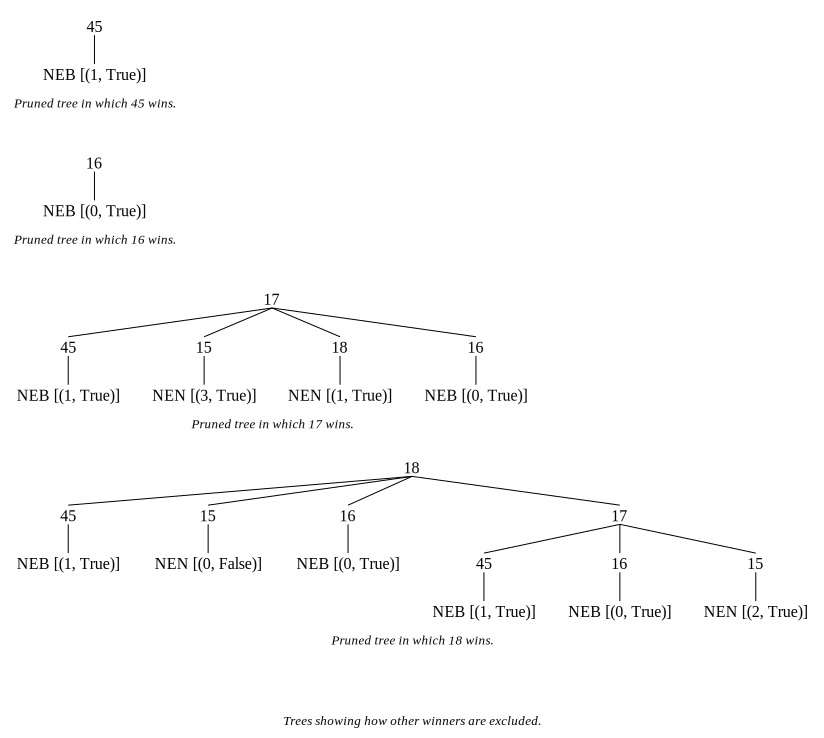

In [3]:
Caption(printTrees(elimTrees),'Trees showing how other winners are excluded.')


Now print all the assertions.  This gives you an explanation of the meaning of each one.


In [4]:
printAssertions(WOLosers,IRVElims)

Not-Eliminated-Before assertions: 
NEB  0: Candidate 15 cannot be eliminated before 16.
NEB  1: Candidate 15 cannot be eliminated before 45.


Not-Eliminated-Next assertions: 
NEN  0: Candidate 15 cannot be eliminated next when {'16', '45', '17'} are eliminated.
NEN  1: Candidate 18 cannot be eliminated next when {'16', '15', '45'} are eliminated.
NEN  2: Candidate 15 cannot be eliminated next when {'16', '45'} are eliminated.
NEN  3: Candidate 15 cannot be eliminated next when {'18', '16', '45'} are eliminated.


Now the audit begins! We now apply a Risk Limiting Audit to test each of the assertions above.
For each assertion, we consider the opposite hypothesis, that candidate C *can* be eliminated at that point. We then try to audit until that hypothesis can be rejected.  If all the hypotheses are rejected, the election result is declared correct.  At any time, if the audit has failed to reject all the hypotheses, a full manual recount can be conducted.
